# Housing Affordability in Vancouver
### Rent vs Income Analysis (2019–2024)

This notebook analyzes housing affordability in Vancouver by comparing
rental price trends with income growth using a rent-to-income ratio.


## Analysis Scope

- Geography: Vancouver Census Metropolitan Area (CMA)
- Time Period: 2019–2024
- Metric: Rent-to-Income Ratio
- Affordability Threshold: 30%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
rent_df = pd.read_csv("../data/processed/vancouver_quarterly_rent_clean.csv")
income_df = pd.read_csv("../data/processed/vancouver_median_income_clean.csv")


In [10]:
rent_df.head()
income_df.head()


,year,median_income
0,2019,43300
1,2020,45800
2,2021,44800
3,2022,45900
4,2023,46300


In [11]:
rent_df.columns

Index(['Geography', 'Rental unit type', 'quarter', 'avg_rent'], dtype='object')

In [12]:
income_df.columns

Index(['year', 'median_income'], dtype='object')

In [13]:
rent_df.shape, income_df.shape

((27, 4), (5, 2))

In [14]:
rent_df["year"] = pd.to_datetime(rent_df["quarter"]).dt.year

C:\Users\Shibi\AppData\Local\Temp\ipykernel_22604\551750247.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rent_df["year"] = pd.to_datetime(rent_df["quarter"]).dt.year


DateParseError: Unknown datetime string format, unable to parse: Q1 2019, at position 0

In [ ]:
# 1) Inspect the weird values (sanity check)
rent_df["quarter"].head(10)


0    Q1 2019
1    Q2 2019
2    Q3 2019
3    Q4 2019
4    Q1 2020
5    Q2 2020
6    Q3 2020
7    Q4 2020
8    Q1 2021
9    Q2 2021
Name: quarter, dtype: object

In [ ]:
# 2) Extract quarter number and year from strings like "Q1 2019"
q = rent_df["quarter"].astype(str).str.extract(r"Q([1-4])\s*(\d{4})")

rent_df["q"] = q[0].astype("Int64")     # 1-4
rent_df["year"] = q[1].astype("Int64")  # 2019, 2020, ...


In [ ]:
rent_df[["quarter", "q", "year"]].head(10)
rent_df[["q", "year"]].isna().sum()


q       0
year    0
dtype: int64

In [ ]:
rent_df["period"] = pd.PeriodIndex(year=rent_df["year"], quarter=rent_df["q"], freq="Q").to_timestamp()
rent_df[["quarter", "period"]].head(10)


C:\Users\Shibi\AppData\Local\Temp\ipykernel_18208\1019828968.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  rent_df["period"] = pd.PeriodIndex(year=rent_df["year"], quarter=rent_df["q"], freq="Q").to_timestamp()


,quarter,period
0,Q1 2019,2019-01-01
1,Q2 2019,2019-04-01
2,Q3 2019,2019-07-01
3,Q4 2019,2019-10-01
4,Q1 2020,2020-01-01
5,Q2 2020,2020-04-01
6,Q3 2020,2020-07-01
7,Q4 2020,2020-10-01
8,Q1 2021,2021-01-01
9,Q2 2021,2021-04-01


In [ ]:
rent_df[["quarter","q","year"]].head(10)

rent_df[["q","year"]].isna().sum()

q       0
year    0
dtype: int64

In [ ]:
rent_df["annual_rent"] = rent_df["avg_rent"] * 12


In [ ]:
rent_df[["avg_rent", "annual_rent"]].head()
rent_df["annual_rent"].describe()


count       26.000000
mean     22878.461538
std       3214.377317
min      18960.000000
25%      19860.000000
50%      21780.000000
75%      25800.000000
max      28080.000000
Name: annual_rent, dtype: float64

In [ ]:
annual_rent_df = (
    rent_df
    .groupby("year", as_index=False)["annual_rent"]
    .mean()
)


In [ ]:
annual_rent_df


,year,annual_rent
0,2019,20160.0
1,2020,19350.0
2,2021,19920.0
3,2022,23400.0
4,2023,26790.0
5,2024,26430.0
6,2025,25320.0


In [ ]:
income_df.head()
income_df.columns


Index(['year', 'median_income'], dtype='object')

In [ ]:
annual_income_df = (
    income_df
    .groupby("year", as_index=False)["avg_income"]
    .mean()
)


KeyError: 'Column not found: avg_income'

In [ ]:
income_df.head()


,year,median_income
0,2019,43300
1,2020,45800
2,2021,44800
3,2022,45900
4,2023,46300


In [ ]:
income_df.columns


Index(['year', 'median_income'], dtype='object')

In [ ]:
annual_income_df = (
    income_df
    .groupby("year", as_index=False)["median_income"]
    .mean()
)


In [ ]:
annual_income_df


,year,median_income
0,2019,43300.0
1,2020,45800.0
2,2021,44800.0
3,2022,45900.0
4,2023,46300.0


In [ ]:
annual_rent_df = annual_rent_df[annual_rent_df["year"].between(2019, 2023)]
annual_income_df = annual_income_df[annual_income_df["year"].between(2019, 2023)]


In [ ]:
annual_rent_df
annual_income_df


,year,median_income
0,2019,43300.0
1,2020,45800.0
2,2021,44800.0
3,2022,45900.0
4,2023,46300.0


In [ ]:
affordability_df = pd.merge(
    annual_rent_df,
    annual_income_df,
    on="year",
    how="inner"
)


In [ ]:
affordability_df


,year,annual_rent,median_income
0,2019,20160.0,43300.0
1,2020,19350.0,45800.0
2,2021,19920.0,44800.0
3,2022,23400.0,45900.0
4,2023,26790.0,46300.0


In [ ]:
affordability_df["rent_to_income_ratio"] = (
    affordability_df["annual_rent"] / affordability_df["median_income"]
)


In [ ]:
affordability_df
affordability_df["rent_to_income_ratio"].describe()


count    5.000000
mean     0.484228
std      0.061826
min      0.422489
25%      0.444643
50%      0.465589
75%      0.509804
max      0.578618
Name: rent_to_income_ratio, dtype: float64

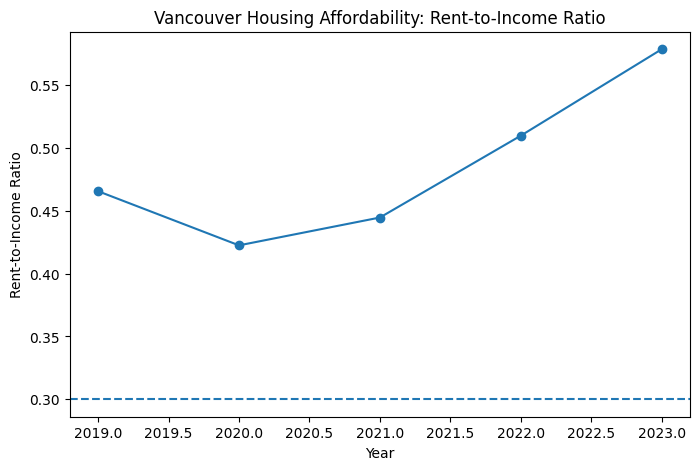

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(
    affordability_df["year"],
    affordability_df["rent_to_income_ratio"],
    marker="o"
)

plt.axhline(0.30, linestyle="--")

plt.title("Vancouver Housing Affordability: Rent-to-Income Ratio")
plt.xlabel("Year")
plt.ylabel("Rent-to-Income Ratio")

plt.show()
